# Chapter 2 - Market Basket Analysis (Association Rule Mining)

Market basket analysis (MBA) is a technique used in data mining by retail companies to increase sales by better understanding customer buying patterns. It involves analyzing large datasets, such as customer purchase history, to uncover item groupings and products that are likely to be frequently purchased together.

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

In [3]:
#read csv data
df = pd.read_csv('data/data.csv',encoding= 'unicode_escape')

#view first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Preparation

In [4]:
#null check
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
#Drop N/A
df1 = df.dropna()

df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#selecting data where quantity > 0
df1 = df1[df1.Quantity > 0]

df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Insights from the dataset

#### Customers Insights

This segment will answer the questions like :

    1.Who all are my loyal customers?
    2.Which customers have ordered most frequently?
    3.Which customers contribute the most to my revenue?

In [9]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
# Creating a new feature 'Amount' which is the product of Quantity and its Unit Price
df1['Amount'] = df1['Quantity'] * df1['UnitPrice']

df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
# Using groupby function to highlight the Customers with most no. of orders (invoices)
orders = df1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

print('The TOP 5 loyal customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 loyal customers with most number of orders...


,CustomerID,Country,InvoiceNo
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


### Number of Orders by Different Customers

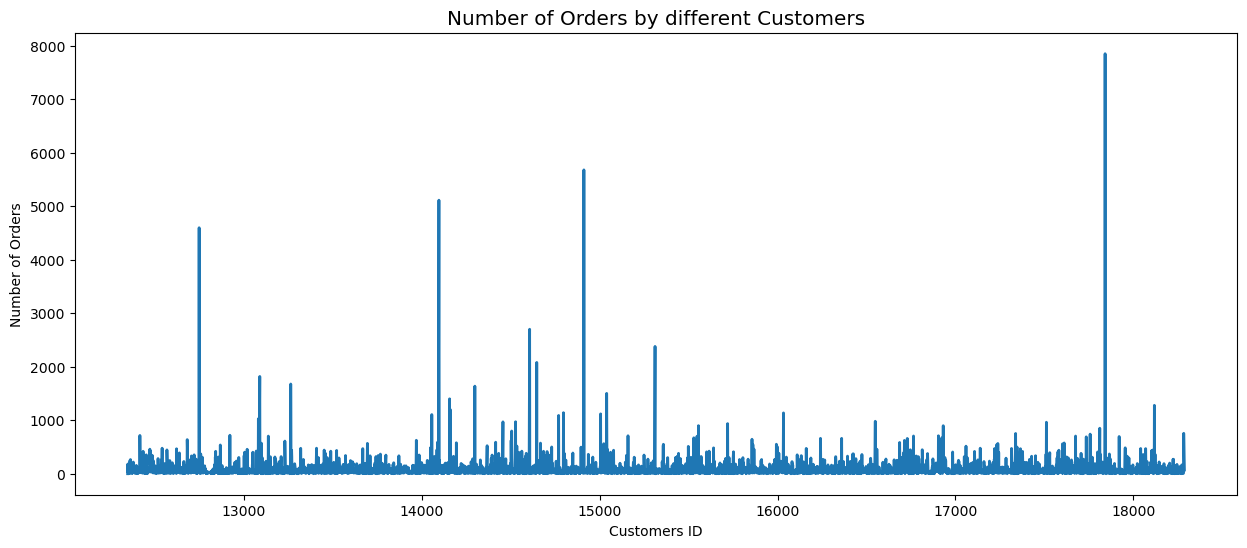

In [13]:
# Creating a subplot of size 15x6
plt.subplots(figsize=(15,6))

# Using the style bmh for better visualization
plt.style.use('bmh')

# X axis will denote the customer ID, Y axis will denote the number of orders
plt.plot(orders.CustomerID, orders.InvoiceNo)

# Labelling the X axis
plt.xlabel('Customers ID')

# Labelling the Y axis
plt.ylabel('Number of Orders')

# Giving a suitable title to the plot
plt.title('Number of Orders by different Customers')

plt.show()

In [15]:
# Using groupby function to highlight the Customers with highest spent amount (invoices)
money_spent = df1.groupby(by=['CustomerID','Country'], as_index=False)['Amount'].sum()

print('The TOP 5 profitable customers with highest money spent...')
money_spent.sort_values(by='Amount', ascending=False).head()

The TOP 5 profitable customers with highest money spent...


,CustomerID,Country,Amount
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


### Money Spent by Different Customers

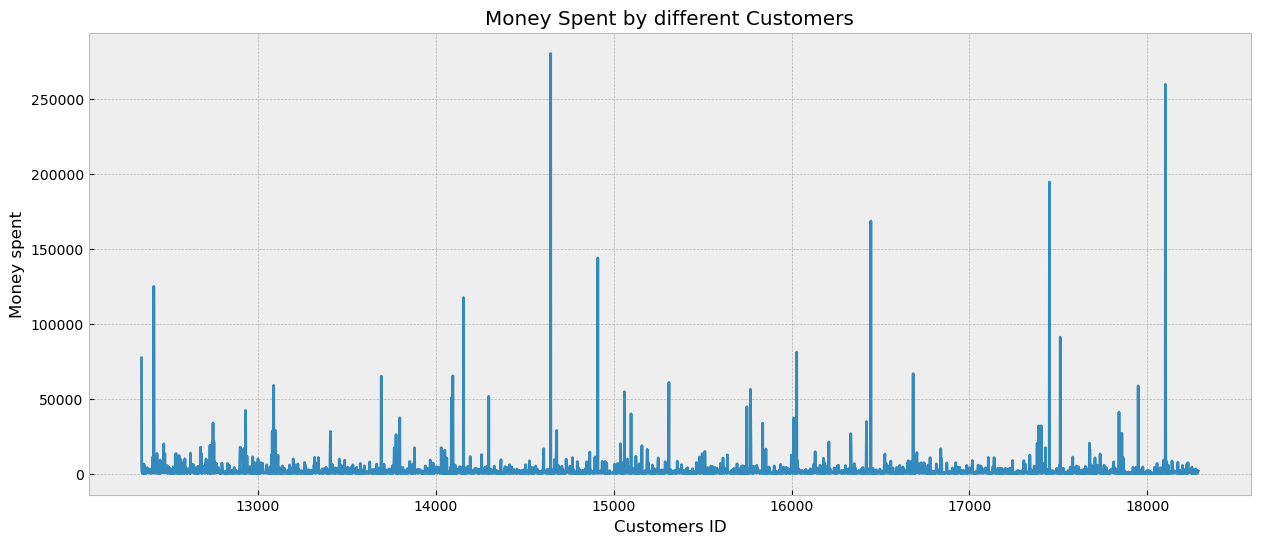

In [16]:
# Creating a subplot of size 15*6
plt.subplots(figsize=(15,6))

# X axis will denote the customer ID, Y axis will denote the amount spent
plt.plot(money_spent.CustomerID, money_spent.Amount)

# Using bmh style for better visualization
plt.style.use('bmh')

# Labelling the X-axis
plt.xlabel('Customers ID')

# Labelling the Y-axis
plt.ylabel('Money spent')

# Giving a suitable title to the plot
plt.title('Money Spent by different Customers')

plt.show()

### Patterns based on DateTime
This segment will answer the questions like:

    1.In which month, the number of orders placed is the highest?
    2.On which Day of a week, the number of orders placed is the highest?
    3.At what time of the day, the store is the busiest?

In [18]:
df1.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
import datetime

# Convert InvoiceDate from object to datetime
df1['InvoiceDate'] = pd.to_datetime(df1.InvoiceDate, format='%m/%d/%Y %H:%M')

# Creating a new feature called year_month, such that December 2010 will be denoted as 201012
df1.insert(loc=2, column='year_month', value=df1['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Creating a new feature for Month
df1.insert(loc=3, column='month', value=df1.InvoiceDate.dt.month)

# Creating a new feature for Day
# +1 to make Monday=1.....until Sunday=7
df1.insert(loc=4, column='day', value=(df1.InvoiceDate.dt.dayofweek)+1)

# Creating a new feature for Hour
df1.insert(loc=5, column='hour', value=df1.InvoiceDate.dt.hour)

df1.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### How many orders are placed per month?

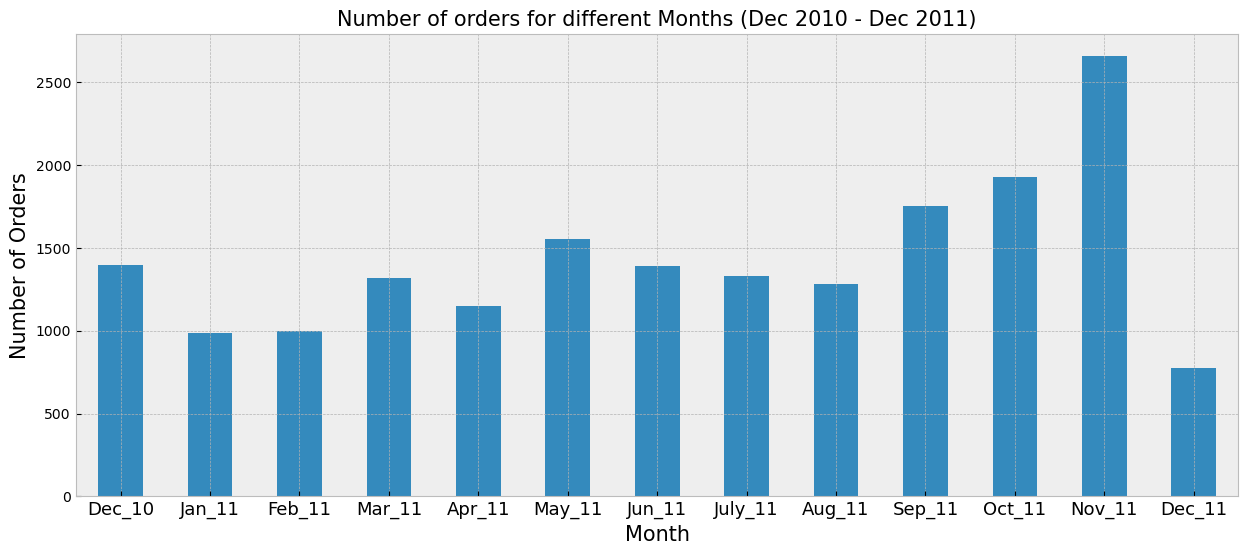

In [19]:
# Using bmh style for better visualization
plt.style.use('bmh')

# Using groupby to extract No. of Invoices year-monthwise
ax = df1.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling the X axis
ax.set_xlabel('Month',fontsize=15)

# Labelling the Y-axis
ax.set_ylabel('Number of Orders',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Number of orders for different Months (Dec 2010 - Dec 2011)',fontsize=15)

# Providing with X tick labels
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), 
                   rotation='horizontal', fontsize=13)

plt.show()

### How many orders are placed per Day?

In [20]:
# Day = 6 is Saturday and there are no orders placed on Saturdays
df1[df1['day']==6]

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount


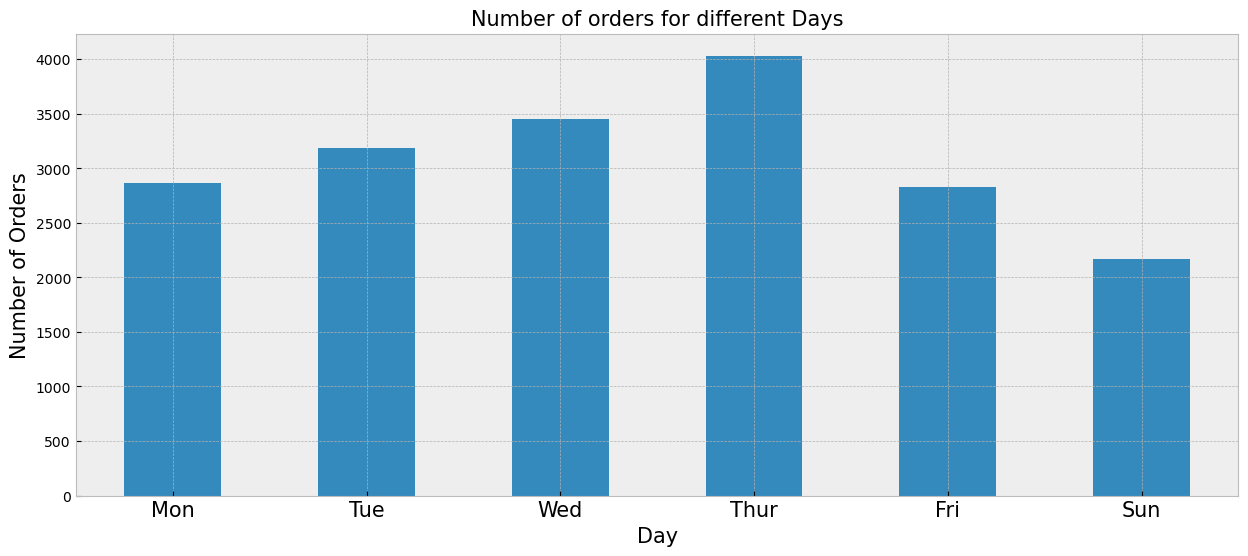

In [21]:
# Using groupby to count no. of Invoices daywise
ax = df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

# Labelling X axis
ax.set_xlabel('Day',fontsize=15)

# Labelling Y axis
ax.set_ylabel('Number of Orders',fontsize=15)

# Giving suitable title to the plot
ax.set_title('Number of orders for different Days',fontsize=15)

# Providing with X tick labels
# Since there are no orders placed on Saturdays, we are excluding Sat from xticklabels
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

plt.show()

### How many orders are placed per Hour?

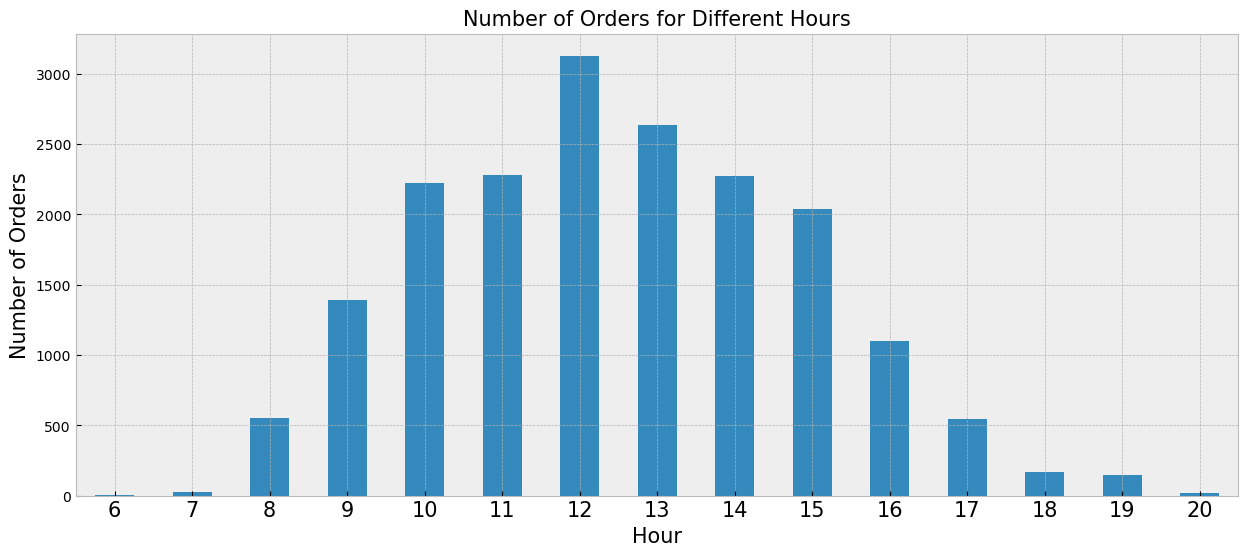

In [23]:
# Using groupby to get unique hours for each invoice, then explode to individual hours
hours = df1.groupby('InvoiceNo')['hour'].unique().explode()

# Count the number of occurrences of each hour
hour_counts = hours.value_counts().sort_index()

# Plot the results
ax = hour_counts.plot(kind='bar', figsize=(15, 6))

# Labeling X axis
ax.set_xlabel('Hour', fontsize=15)

# Labeling Y axis
ax.set_ylabel('Number of Orders', fontsize=15)

# Giving a suitable title to the plot
ax.set_title('Number of Orders for Different Hours', fontsize=15)

# Providing with X tick labels (all orders are placed between 6 and 20 hour)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)

plt.show()